## Caracterización

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

data = "data.xlsx"
data = pd.read_excel(data)
data

,Corriente (uA),Voltaje (mV),Error Voltaje (mV),Error Corriente (uA)
0,10,0.98,0.01,0
1,20,1.98,0.01,0
2,30,2.98,0.01,0
3,40,3.97,0.01,0
4,50,4.95,0.01,0
5,60,5.95,0.01,0
6,70,6.93,0.01,0
7,80,7.93,0.01,0
8,90,8.91,0.01,0


In [2]:
V = data['Voltaje (mV)']
C = data['Corriente (uA)']
Verr = data['Error Voltaje (mV)']
Cerr = data['Error Corriente (uA)']


In [3]:
X = C
Xerr = Cerr

Y = V
Yerr = Verr

X

0    10
1    20
2    30
3    40
4    50
5    60
6    70
7    80
8    90
Name: Corriente (uA), dtype: int64

In [4]:
N = len(X)

N

9

In [5]:
sum_x = (X).sum()
sum_y = (Y).sum()
sum_xx = (X**2).sum()
sum_xy = (X*Y).sum()

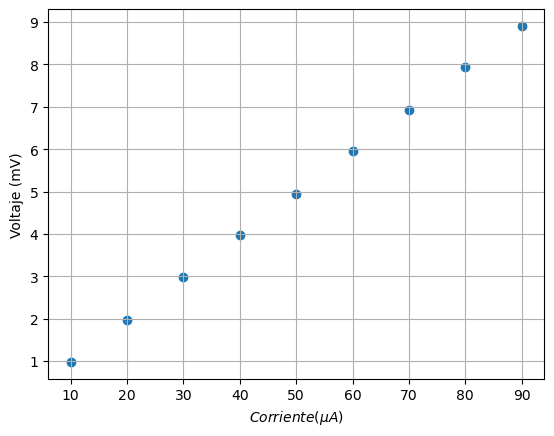

In [6]:
plt.scatter(X,Y)
plt.xlabel(r'$Corriente (\mu A)$')
plt.ylabel('Voltaje (mV)')
plt.grid()

In [7]:
Delta = N*sum_xx - sum_x**2
m = (N*sum_xy - sum_x*sum_y) / (Delta)
b = (sum_xx*sum_y - sum_x*sum_xy) / (Delta)

alpha_CU = np.sqrt( (1/(N-2)) * np.sum((Y - m*X - b)**2) )

m_std_err = alpha_CU*np.sqrt(N/Delta)
b_std_err = alpha_CU*np.sqrt(sum_xx/Delta)

model = m*X + b

In [8]:
model

0    0.990000
1    1.980833
2    2.971667
3    3.962500
4    4.953333
5    5.944167
6    6.935000
7    7.925833
8    8.916667
Name: Corriente (uA), dtype: float64

In [9]:
m

0.09908333333333333

In [10]:
b

-0.0008333333333333334

In [11]:
m_std_err

9.236745114891226e-05

In [12]:
b_std_err

0.005197806822804966

In [13]:
alpha_CU

0.007154752000627286

Note que la magnitud de la incertidumbre común (alpha_CU) es similar a la magnitud del error en Y de los datos (es decir, 0.01 mV). Esto parece indicar que realizar una regresión lineal fue una decisión apropiada.

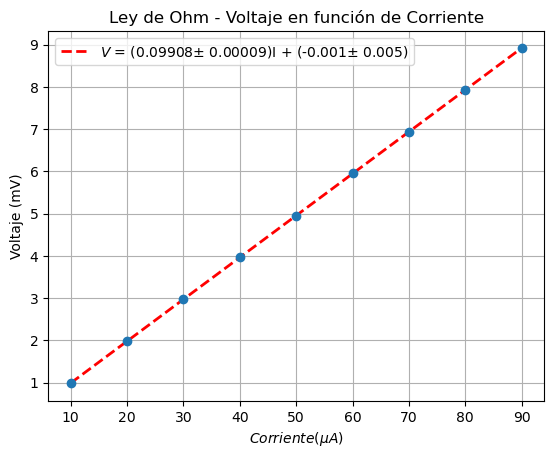

In [14]:
fig1, (ax1) = plt.subplots(1, 1)

ax1.plot(X,model, color='red', linewidth=2, linestyle='--', label=r'$V$'f' = ({m:.5f}± {m_std_err:.5f})' r'I' f' + ({b:.3f}± {b_std_err:.3f})')
ax1.errorbar(X, Y, Yerr, Xerr, fmt='o')

ax1.set_xlabel(r'$Corriente (\mu A)$')
ax1.set_ylabel('Voltaje (mV)')
ax1.legend(loc='upper left')
ax1.set_title('Ley de Ohm - Voltaje en función de Corriente')
ax1.grid()

plt.savefig('plot_53.png', format='png')

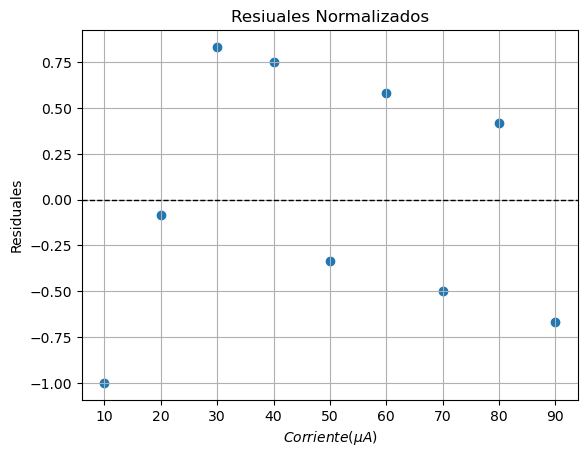

In [15]:
res = (Y - model)/Yerr

fig2, (ax2) = plt.subplots(1, 1)

ax2.scatter(X, res)
ax2.axhline(0, color='black', linewidth=1, linestyle='--')

ax2.set_xlabel(r'$Corriente (\mu A)$')
ax2.set_ylabel('Residuales')
ax2.set_title('Resiuales Normalizados')
ax2.grid()

plt.savefig('residuales_53.png', format='png')

La magnitud de los residuales normalizados no supera 1.00 y, además, estos no siguen un patrón claro. Pir este motivo, podemos concluir que la regresión lineal que realizamos es apropiada.

In [16]:
res

0   -1.000000
1   -0.083333
2    0.833333
3    0.750000
4   -0.333333
5    0.583333
6   -0.500000
7    0.416667
8   -0.666667
dtype: float64